In [1]:
from scipy.spatial import ConvexHull
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import imageio
from mpl_toolkits.mplot3d import Axes3D

In [11]:
points = np.random.rand(30,3)
print(points)
xpoints=points[:,0]
ypoints=points[:,1]
zpoints = points[:,2]

hull = ConvexHull(points)  
neighbours = []

def find_neighbours(points):
    for i in range (len(points)):
        neighbours.append([])

    for i in range (len(hull.simplices)):
            neighbours[hull.simplices[i][0]].append(hull.simplices[i][1])
            neighbours[hull.simplices[i][0]].append(hull.simplices[i][2])

            neighbours[hull.simplices[i][1]].append(hull.simplices[i][0])
            neighbours[hull.simplices[i][1]].append(hull.simplices[i][2])

            neighbours[hull.simplices[i][2]].append(hull.simplices[i][0])
            neighbours[hull.simplices[i][2]].append(hull.simplices[i][1])

    for i in range (len(neighbours)):
        neighbours[i] = list(set(neighbours[i]))
    return neighbours

[[0.05575041 0.80123704 0.95678808]
 [0.0503042  0.13051811 0.73949717]
 [0.16525849 0.41168405 0.33636142]
 [0.62944823 0.42967072 0.56756953]
 [0.76838483 0.81927785 0.70469364]
 [0.58623879 0.91681957 0.43406244]
 [0.87446021 0.78068968 0.88627778]
 [0.34703564 0.43513756 0.08790954]
 [0.17822339 0.54514216 0.42192335]
 [0.72675268 0.82336979 0.81742543]
 [0.13956186 0.09052652 0.6189053 ]
 [0.92387745 0.56967806 0.37877484]
 [0.79120824 0.28608375 0.60807154]
 [0.31647358 0.18150252 0.216136  ]
 [0.09197218 0.93429786 0.25298839]
 [0.27845751 0.20593375 0.92352789]
 [0.40250548 0.54225945 0.76809852]
 [0.29982333 0.40229046 0.8117194 ]
 [0.36047872 0.54836553 0.64779674]
 [0.32605853 0.02116805 0.45778294]
 [0.89484536 0.12035768 0.22552954]
 [0.97180501 0.20231475 0.41255228]
 [0.53930281 0.38742852 0.94799912]
 [0.06183488 0.29141718 0.71112889]
 [0.64240519 0.8339362  0.03962865]
 [0.96265582 0.35424186 0.08819362]
 [0.82835353 0.50683863 0.72263656]
 [0.8759759  0.15804936 0.81

In [12]:
neighbours = find_neighbours(points)
unit_vecs = []
for i in range (len(points)):
    unit_vecs.append(0)
    
for i in hull.vertices:
    unit_vector = 0
        
    for j in neighbours[i]:
        vector2 = points[j] - points[i]
        mag_2 = np.sqrt(vector2.dot(vector2))
        unit_vector2 = vector2/mag_2
        unit_vector += unit_vector2

    if np.sqrt(unit_vector.dot(unit_vector)) != 0:
        unit_vector = unit_vector / (np.sqrt(unit_vector.dot(unit_vector)))
        unit_vector = unit_vector.tolist()

    unit_vecs[i] = unit_vector
    
    
#print(unit_vecs)

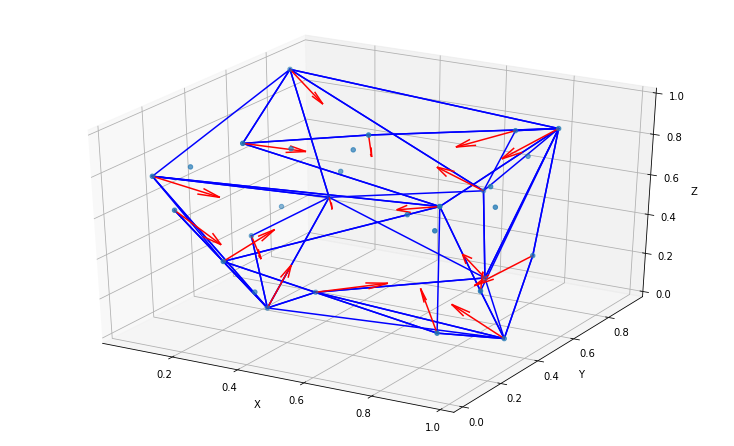

In [13]:
fig = plt.figure(figsize = (10,6))

ax = Axes3D(fig)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")


ax.scatter(points[:,0], points[:,1], points[:,2], 'r')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], points[simplex,2], 'b-')
#ax.scatter(xpoints[8], ypoints[8], zpoints[8], "g")

lines_to_draw = unit_vecs
us = []
vs = []
ws = []

for i in hull.vertices:
    us.append(unit_vecs[i][0] /5)
    vs.append(unit_vecs[i][1] / 5)
    ws.append(unit_vecs[i][2] / 5)

xs, ys, zs    = points[hull.vertices,0], points[hull.vertices, 1], points[hull.vertices,2]

ax.quiver(xs, ys, zs, us, vs, ws, color = "r")

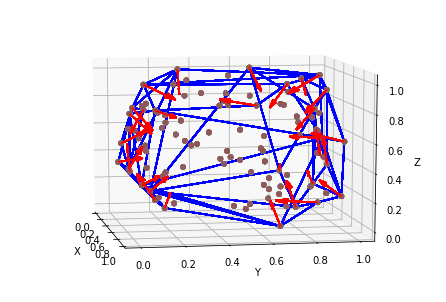

In [329]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
for ii in range(0,360,10):
    ax.view_init(elev=10., azim=ii)
    ax.scatter(points[:,0], points[:,1], points[:,2], 'r')
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], points[simplex,2], 'b-')
    ax.quiver(xs, ys, zs, us, vs, ws, color = "r")
    plt.savefig("quiverazim={}".format(ii))

In [330]:
filenames= ["quiverazim={}.png".format(10*x) for x in range(36)]

images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('quiveroutput100points.gif', images, fps=5)

In [270]:
# fig = plt.figure(figsize = (10,6))

# ax = Axes3D(fig)
# ax.set_xlabel("X")
# ax.set_ylabel("Y")
# ax.set_zlabel("Z")
# ax.scatter(xpoints, ypoints, zpoints, 'r')
# for simplex in hull.simplices:
#     plt.plot(my_points[simplex, 0], my_points[simplex, 1], my_points[simplex,2], 'b-')
# ax.scatter(xpoints[8], ypoints[8], zpoints[8], "g")

# #plt.plot([my_points[3][0], unit_vecs[3][0]], [my_points[3][1], unit_vecs[3][1]], [my_points[3][2], unit_vecs[3][2]])
# for i in hull.vertices:
#     plt.plot([my_points[i][0], unit_vecs[i][0]], [my_points[i][1], unit_vecs[i][1]], [my_points[i][2], unit_vecs[i][2]])
    

JIT COMPILATION

In [356]:
no_cells = 20
points = np.random.rand(no_cells,3)
xpoints=points[:,0]
ypoints=points[:,1]
zpoints = points[:,2]

hull = ConvexHull(points)

In [357]:
hull = ConvexHull(points)  
neighbours = []
find_neighbours(points)

[[4, 5, 7, 9, 10, 12, 18],
 [18, 6, 15],
 [],
 [],
 [0, 8, 9, 10, 13],
 [0, 9, 18],
 [1, 7, 8, 11, 12, 15, 18],
 [0, 18, 12, 6],
 [4, 6, 10, 11, 12, 13, 16],
 [0, 4, 5, 13, 18],
 [8, 0, 4, 12],
 [8, 16, 6, 15],
 [0, 6, 7, 8, 10],
 [4, 8, 9, 16, 18],
 [],
 [1, 6, 11, 16, 18],
 [8, 11, 13, 15, 18],
 [],
 [0, 1, 5, 6, 7, 9, 13, 15, 16],
 []]

In [22]:
neighbours = np.zeros((no_cells, no_cells))
#print(neighbours)
for i in range (len(hull.simplices)):

    first_number = hull.simplices[i][0]
    second_number = hull.simplices[i][1]
    third_number = hull.simplices[i][2]

    if first_number not in neighbours[second_number]:
        for j in range(no_cells):
            if neighbours[second_number,j] == 0:
                neighbours[second_number, j] = first_number
                break
    if first_number not in neighbours[third_number]:
        for j in range(no_cells):
            if neighbours[third_number,j] == 0:
                neighbours[third_number, j] = first_number
                break
            
    if second_number not in neighbours[first_number]:
        for j in range(no_cells):
            if neighbours[first_number,j] == 0:
                neighbours[first_number, j] = second_number
                break
    if second_number not in neighbours[third_number]:
        for j in range(no_cells):
            if neighbours[third_number,j] == 0:
                neighbours[third_number, j] = second_number
                break
            
    if third_number not in neighbours[first_number]:
        for j in range(no_cells):
            if neighbours[first_number,j] == 0:
                neighbours[first_number, j] = third_number
                break
    if third_number not in neighbours[second_number]:
        for j in range(no_cells):
            if neighbours[second_number,j] == 0:
                neighbours[second_number, j] = third_number
                break
        
#print(neighbours)
   

NameError: name 'no_cells' is not defined

In [54]:
points = ([1.0908872565338763, -1.4710010986524509, 1.961219453606696, 0.6639804973728074, 1.471520263404046,
          0.38312453836366345, 1.7148138477020547, 0.0068777993253998915, 1.0480135810897702, 0.31583321282899135,
           0.3982051687611534, -0.15683451791882774,1.4511811015800316, 0.7632448692427083, -1.6143669584367517, 
           0.9893167610056688, 0.9882514352769345, -0.28688183394649336, 0.6174922283609456, 0.862431166524555, 
           -0.42094825830713933, 0.1786836251676842, -0.10118570603990662, 1.3293411618408175, -1.2713157880175379,
           -1.7975146536046323, -0.2904178852528041, 1.1150042013182917, 0.9758595066990816, -0.8091965544250224])
points = np.array(points)
points = points.reshape(10,3)
x_points = points[:,0]
y_points = points[:,1]
z_points = points[:,2]
hull = ConvexHull(points)
print(find_neighbours(points))

[[8, 2, 4, 7], [2, 3, 4, 6, 7, 8, 9], [0, 1, 3, 4, 5, 6, 7, 8, 9], [1, 2, 5, 7, 9], [0, 1, 2, 6, 7, 8], [2, 3, 6, 7], [1, 2, 4, 5, 7, 8], [0, 1, 2, 3, 4, 5, 6, 8], [0, 1, 2, 4, 6, 7, 9], [8, 1, 2, 3], [], [], [], [], [], [], [], [], [], []]


In [57]:
unit_vecs = ([-0.2528903537216165, 0.6228263148739622, -0.7403606219235839, 0.026211225474512045,
              -0.9572163780727597, -0.2881835824754625, -0.9491563417972891, 0.07971383907565235,
              -0.3045454689956965, 0.0, 0.0, 0.0, -0.3720643044819121, -0.24810911189095042, 0.8944327934099213,
              0.0, 0.0, 0.0, 0.13749286403464905, -0.9883706216467485, 0.06495557408852365, 0.7653061335556516,
              -0.30821729522245245, -0.5650739959225296, 0.6845952324932687, 0.686805267026893, 0.24418823237741324,
              0.0, 0.0, 0.0])
unit_vecs = np.array(unit_vecs)
unit_vecs = unit_vecs.reshape(10,3)

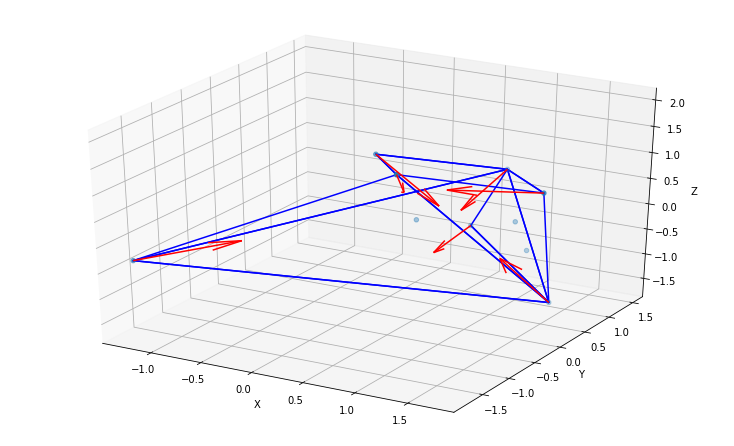

In [58]:
fig = plt.figure(figsize = (10,6))

ax = Axes3D(fig)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")


ax.scatter(points[:,0], points[:,1], points[:,2], 'r')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], points[simplex,2], 'b-')
#ax.scatter(xpoints[8], ypoints[8], zpoints[8], "g")

lines_to_draw = unit_vecs
us = []
vs = []
ws = []

for i in hull.vertices:
    us.append(unit_vecs[i][0] )
    vs.append(unit_vecs[i][1] )
    ws.append(unit_vecs[i][2] )

xs, ys, zs    = points[hull.vertices,0], points[hull.vertices, 1], points[hull.vertices,2]

ax.quiver(xs, ys, zs, us, vs, ws, color = "r")

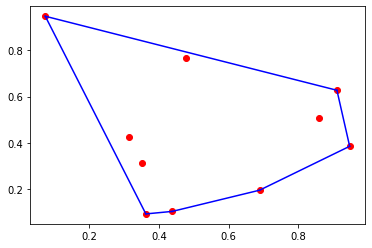

In [21]:
points = np.random.rand(10,2)
hull = ConvexHull(points)
plt.plot(points[:,0], points[:,1], 'ro')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'b-')